### Some gray transformation in lecture 2

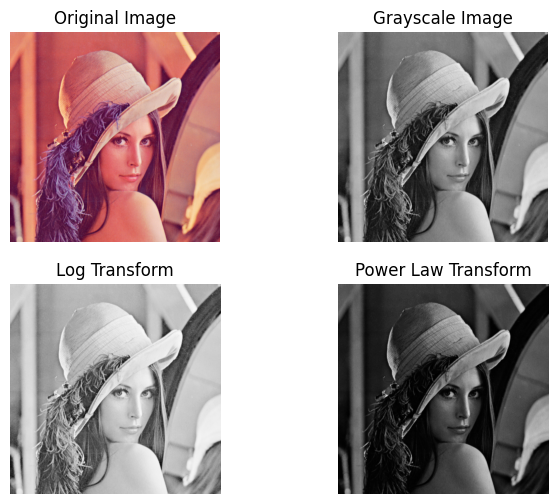

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def log_transform(img, c=20):
    return c * np.log(img + 1)

def power_law_transform(img, gamma=2.5):
    c = (255 - 1) ** (1 - gamma)
    return c * img ** gamma

# Read the image
img = cv2.imread('lena.png')

# Convert the image to grayscale
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Apply transformations to the grayscale image
log_transformed_img = log_transform(img_gray)
power_law_transformed_img = power_law_transform(img_gray)

# Display the original and processed images
plt.figure(figsize=(12, 6))

plt.subplot(2, 3, 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

plt.subplot(2, 3, 2)
plt.imshow(img_gray, cmap='gray')
plt.title('Grayscale Image')
plt.axis('off')

plt.subplot(2, 3, 4)
plt.imshow(log_transformed_img, cmap='gray')
plt.title('Log Transform')
plt.axis('off')

plt.subplot(2, 3, 5)
plt.imshow(power_law_transformed_img, cmap='gray')
plt.title('Power Law Transform')
plt.axis('off')

plt.show()


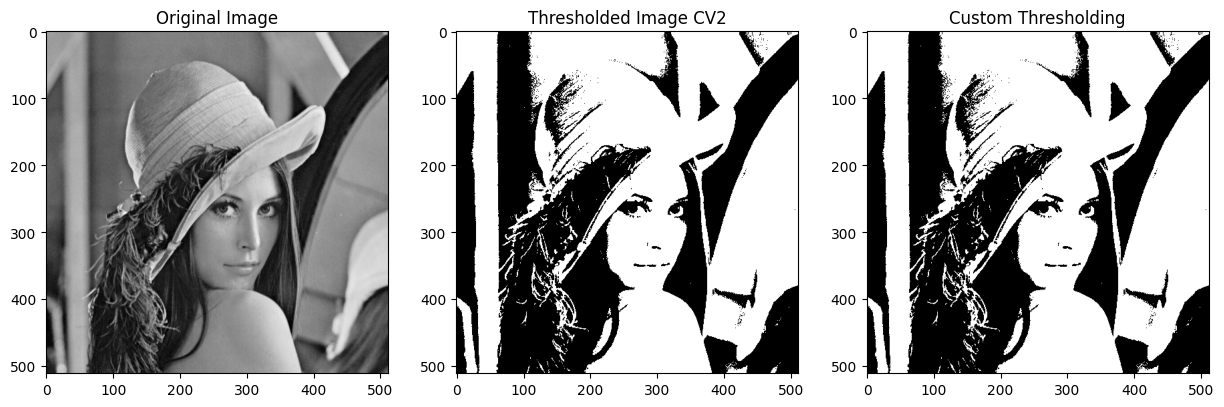

In [1]:
############ Piece-wise linear transformation : Thresholding ############
import cv2
import numpy as np
import matplotlib.pyplot as plt
image_path = "./lena.png"
I = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

threshold = 0.5
threshold_value = int(threshold * 255)

_, J = cv2.threshold(I, threshold_value, 255, cv2.THRESH_BINARY)

range_min, range_max = 0, 255
K = (I > threshold * range_max).astype(np.uint8) * 255

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(I, cmap='gray')
plt.title('Original Image')

plt.subplot(1, 3, 2)
plt.imshow(J, cmap='gray')
plt.title('Thresholded Image CV2')

plt.subplot(1, 3, 3)
plt.imshow(K, cmap='gray')
plt.title('Custom Thresholding')

plt.show()

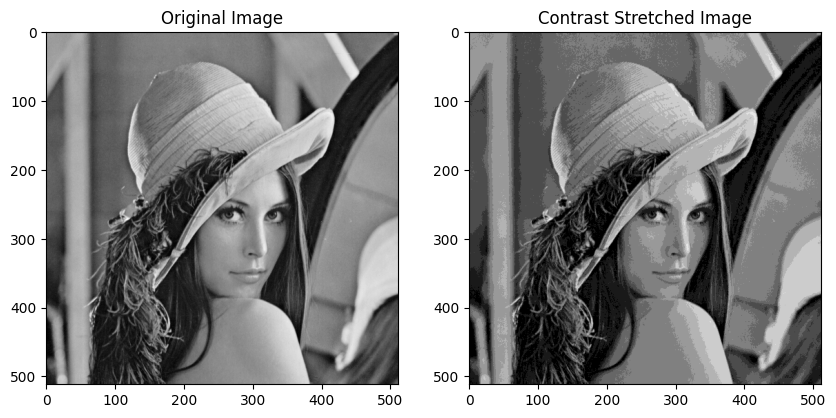

In [2]:
#####Constant Stretching
import cv2
import numpy as np
import matplotlib.pyplot as plt

def contrast_stretching(image, low, high):
  """
  """
  min_val, max_val = np.min(image), np.max(image)

  range_val = max_val - min_val

  output_values = (image - min_val) / range_val * (high - low) + low
  output_values = output_values.astype(np.uint8)

  return output_values

# Đọc ảnh từ file
image_path = './lena.png'
I = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Định nghĩa giá trị min và max cho đầu ra (output)
min_out, max_out = 0, 10


stretched_image = contrast_stretching(I, min_out, max_out)


plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(I, cmap='gray')
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(stretched_image, cmap='gray')
plt.title('Contrast Stretched Image')

plt.show()


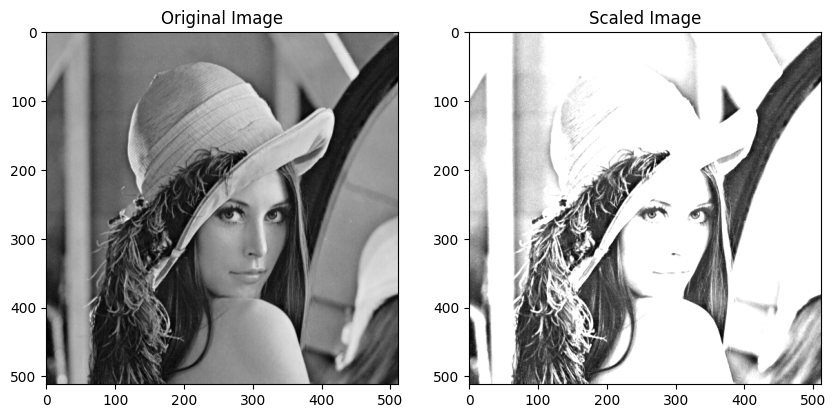

In [13]:
##### Scaling ##### 
import cv2
import numpy as np
import matplotlib.pyplot as plt

def scale_dynamic_range(image, umin, umax):
    L = 256
    scaled_image = ((image - umin) / (umax - umin)) * (L - 1)
    scaled_image = np.clip(scaled_image, 0, L - 1)
    return scaled_image.astype(np.uint8)

# Đọc ảnh từ file
image_path = './lena.png'
original_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

umin = 0
umax = 128

scaled_image = scale_dynamic_range(original_image, umin, umax)

# Hiển thị hình ảnh gốc và hình ảnh đã scale
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(original_image, cmap='gray')
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(scaled_image, cmap='gray')
plt.title('Scaled Image')

plt.show()


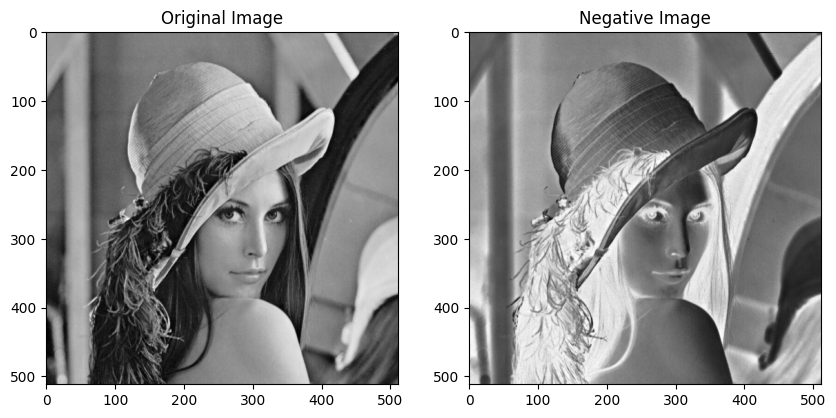

In [10]:
#######Image Negative###########
import cv2
import numpy as np
import matplotlib.pyplot as plt

def create_negative_image(image):
    L = 256
    negative_image = L - 1 - image
    return negative_image.astype(np.uint8)

image_path = './lena.png'
original_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

negative_image = create_negative_image(original_image)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(original_image, cmap='gray')
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(negative_image, cmap='gray')
plt.title('Negative Image')

plt.show()
